# Mathematik für Biologiestudierende

Wintersemester 2024/25

04.12.2024

&copy; 2024 Prof. Dr. Rüdiger W. Braun 

# Fehler erster und zweiter Art

* *Der Fehler 1. Art* ist die fälschliche Ablehnung der Nullhypothese.
* *Der Fehler 2. Art* ist die fälschliche Beibehaltung der Nullhypothese 

Die Priorität liegt auf der Vermeidung des Fehlers 1. Art.  Diese Asymmetrie ist ein entscheidendes Merkmal der Testtheorie.

|                     | $H_0$ wird beibehalten | $H_0$ wird abgelehnt  |
|---------------------|:----------------------:|:---------------------:|
| $H_0$ **trifft zu** | richtige Entscheidung  | Fehler 1. Art         |
| $H_1$ **trifft zu** | Fehler 2. Art          | richtige Entscheidung |

* Fehlerwahrscheinlichkeit 1. Art soll kleiner sein als das Signifikanzniveau $\alpha$
* Die Komplementärwhrscheinlichkeit der Fehlerwahrscheinlichkeit 2. Art ist die Power

## Ein- und zweiseitige Tests

* Ein ja/nein-Experiment mit unbekannter Erfolgswahrscheinlichkeit $p$ wird $n$-mal wiederholt
* Ziel:  Aussage über $p$ relativ zu einem Referenzwert $p_0$ 
* verschiedene Nullhypothesen sind denkbar
  * $H_0 : p\ge p_0$: einseitiger unterer Test
  * $H_0 : p \le p_0$: einseitiger oberer Test
  * $H_0 : p = p_0$: zweiseitiger Test

* einseitige Tests kennen wir aus der vorigen Lektion
* zweiseitige folgen in dieser

* vorher noch ein einseitiger

## Beispiel: Mutationen

* In einer Population weist normalerweise jedes 250te Individuum eine gewisse Mutation auf.  
* Bei einer Untersuchung von 2000 Individuen werden nun aber sogar 12 Träger der Mutation gefunden,
* $2000/250=8$, man hätte also 8 Träger von Mutationen erwartet

Zwei Interpretationen sind denkbar

* Eine Steigerung der Mutationshäufigkeit um 50% wurde entdeckt
* Unter 2000 Individuen wurden gerade mal vier Ausreißer entdeckt

#### Statistics to the rescue!

* Bevor wir diese Entdeckung an die Presse geben, wollen wir sicher sein, dass die Mutationsrate tatsächlich gestiegen ist
* Sicherheit ist relativ.  Mit einem Irrtumsrisiko von 5% können wir leben

## Binomialtest für das Beispiel

* Wir machen einen Binomialtest.  Die Referenzwahrscheinlichkeit ist $p_0 = 0.004$
* Die Nullhypothese ist $H_0 = \{ p \le p_0 \}$
    * Es handelt sich um einen einseitigen, oberen Binomialtest
    * Das Signifikanzniveau beträgt $\alpha = 0.05$

* Der kritische Wert $c$ ist so zu wählen, dass `P.cdf(c-1)`$<1-\alpha$ und `P.cdf(c)`$\ge1-\alpha$

* Entscheidungsregel:
     * Die Nullhypothese wird abgelehnt, falls die Anzahl der Erfolge echt größer als $c$ ist
     * Die Nullhypothese wird beibehalten, falls die Anzahl der Erfolge höchstens $c$ ist

In [1]:
from scipy import stats
import numpy as np
np.set_printoptions(legacy='1.21')
P = stats.binom(2000, 0.004)
alpha = 0.05

In [2]:
P.ppf(1-alpha)

13.0

### Mutation: Entscheidung

* Die Rechnung ergibt $c = 13$
* Bei bis zu 13 Erfolgen (einschließlich) wird die Nullhypothese beibehalten
* Wir haben nur 12 Mutationen beobachtet:  Nullhypothese wir beibehalten
* Keine signifikante Erhöhung beobachtet

## Maschinelle Auswertung und der *p*-Wert

## Der *p*-Wert

* Der $p$-Wert ist das kleinste Signifikanzniveau, zu dem die Daten den Test noch bestehen würden.
* Der $p$-Wert beantwortet die Frage
>  Wie knapp wurde das vorgeschriebene Signifikanzniveau eingehalten bzw. verfehlt?
* Wenn $\alpha$ das Signifikanzniveau ist
  * $p \le \alpha$: Nullhypothese wird abgelehnt 
  * $p > \alpha$: Nullhypothese wird beibehalten

Software gibt immer den $p$-Wert aus

In [3]:
res = stats.binomtest(12, 2000, 0.004, alternative="greater")
res

BinomTestResult(k=12, n=2000, alternative='greater', statistic=0.006, pvalue=0.1114898591368222)

In [4]:
res.pvalue

0.1114898591368222

In [5]:
res.statistic

0.006

In [6]:
res.statistic == 12/2000

True

Der Begriff der Teststatistik spielt erst bei den später zu besprechenden Tests eine Rolle

> `stats.binomialtest(k, n, p0, alternative)`

* `k` ist die beobachtete Anzahl
* `n` ist der Stichprobenumfang
* `p0` ist die Referenzwahrscheinlichkeit
* `alternative` legt fest, ob ein oberer, unterer oder zweiseitiger Test gerechnet wird
  * `alternative="greater"` bedeutet:  oberer Test
  * `alternative="less"` bedeutet: unterer Test
  * `alternative="two-sided"` bedeutet:  zweiseitiger Test
  * keine Angabe:  zweiseitiger Test

### Alternative

* `alternative="greater"` heißt:  wir behaupten, dass die tatsächliche Erfolgswahrscheinlichkeit größer als die Referenzwahrscheinlichkeit ist

## Power des Tests

* Wir wollen eine Erhöhung der Mutationsrate um 50%, also von $p_0=0.004$ auf $p=0.006$ entdecken
* Was ist dann die Power des Tests?
* Die Power ist die Wahrscheinlichtkeit für die richtige Entscheidung, wenn die Alternative tatsächlich zutrifft

* $H_0$ wird abgelehnt bei mindestens 14 Erfolgen

In [7]:
Q = stats.binom(2000, 0.006)

* Wenn 13 oder weniger Erfolge beobachtet werden, mache ich den Fehler zweiter Art
* Also ist die Fehlerwahrscheinlichkeit zweiter Art gleich

In [8]:
Q.cdf(13)

0.6818540941767756

und die Power ist gleich

In [9]:
1 - Q.cdf(13)

0.31814590582322444

## Zweiseitiger Binomialtest zum Niveau  $\alpha$

* Gegeben sind unabhängige $B(1, p)$-verteilte Zufallsvariable $X_1, \dots, X_n$ mit unbekanntem $p$ sowie ein Signifikanzniveau $\alpha$
* Verglichen werden soll mit einem Referenzwert $p_0$
* Getestet wird die Nullhypothese $H_0 = \{p = p_0\}$ gegen die Alternative $H_1 = \{p \ne p_0\}$
* `P` ist die Binomialverteilung $B_{n,p_0}$

* Der *untere kritische Wert* $c_1$ ist so zu wählen, dass `P.cdf(c1 - 1)`$\le\frac\alpha2$ und `P.cdf(c1)`$>\frac\alpha2$

* Der *obere kritische Wert* $c_2$ ist so zu wählen, dass `P.cdf(c2 - 1)`$<1-\frac\alpha2$ und `P.cdf(c2)`$\ge1-\frac\alpha2$

Der zweiseitige Binomialtest besteht also aus einem unteren und einem oberen einseitigen Binomialtest, die aber beide zum halben Signifikanzniveau durchgeführt werden

## Zweiseitiger Binomialtest, Beispiel

* Bei 250 Würfen eines Würfels fiel 55 mal eine Sechs.  Kann man zu 95% sicher sein, dass der Würfel gezinkt ist?
* Sei $p$ die unbekannte Wahrscheinlichkeit des Würfels für eine Sechs
* Zweiseitiger Binomialtest mit
  * Nullhypothese: $H_0 = \left\{ p = \frac16 \right\}$
  * Alternative: $H_1 = \left\{ p \ne \frac16 \right\}$
  * Signifikanzniveau ist $\alpha = 0.05$

In [10]:
P = stats.binom(250, 1/6)
alpha = 0.05

In [11]:
c1 = P.ppf(alpha/2)
c1

30.0

In [12]:
c2 = P.ppf(1-alpha/2)
c2

54.0

Punktrechnung vor Strichrechnung

Achtung:  keine Seite der HHU: https://www.spiegel.de/spiegel/print/index-2023.html

### Beispiel, Fortsetzung

* $c_1 = 30$ und $c_2 = 54$
* Die Nullhypothese kann zum Niveau $\alpha = 0.05$ abgelehnt werden, wenn höchstens 29 oder mindestens 55 Sechsen fallen
* Bei 55 Sechsen kann die Nullhypothese also abgelehnt werden
* Wir können mit 95% Sicherheit sagen, dass der Würfel gezinkt ist

<img src="bilder/b250.svg" alt="Fehler zweiter Art für das Würfelbeispiel" width="55%"/>

Gelbe Balken zeigen Fehlentscheidungen

## *p*-Wert des zweiseitigen Tests

In [13]:
res = stats.binomtest(55, 250, 1/6)  # "zweiseitig" ist die Standardeinstellung
res.pvalue

0.02718643157092374

## Power des zweiseitigen Tests

* Wir wollen erkennen können, wenn der Würfel so stark gezinkt ist,  dass die Wahrscheinlichkeit für eine Sechs 20% beträgt.  Was ist dann die Power des Tests?

* Die Wahrscheinlichkeit der richtigen Entscheidung ist
$$  \sum_{k=0}^{29} B_{250,\,0.2}(k) + \sum_{k=55}^{250} B_{250,\,0.2}(k) $$

In [14]:
Q = stats.binom(250, 0.2)

In [15]:
erste_summe = Q.cdf(29)
erste_summe

0.0002997560505954973

In [16]:
zweite_summe = 1 - Q.cdf(54)
zweite_summe

0.2359822558674649

In [17]:
power = erste_summe + zweite_summe
power

0.2362820119180604

# Versuchsplanung

* Im Beispiel "Mutation" hatten wir für n=2000 eine Power von 32% erzielt.  
* Welche Power hätten wir für n=10000?

In [18]:
n = 10000
alpha = 0.05
p0 = 0.004
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

51.0

Der kritische Wert ist also $c=51$

In [19]:
p = 0.006
Q = stats.binom(n, p)
1 - Q.cdf(c)  

0.865685152339395

* 0.8657 ist die Wahrscheinlichkeit für die richtige Entshceidung, also die Power 
* Der Stichprobenumfang beträgt dabei n=10000

### Frage:  Bei welchem Stichprobenumfang bekommen wir eine Power von 90%

* Bereits gesehen:  n=10000 ist zu wenig
* Dasselbe mit n=20000:

In [20]:
n = 20000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

95.0

In [21]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.989577529617209

Zu viel

In [22]:
n = 12000
P = stats.binom(n, p0)
c = P.ppf(1-alpha)
c

60.0

In [23]:
Q = stats.binom(n, p)
1 - Q.cdf(c)

0.9158835701280577

* n=12000 reicht aus
* Genaue Wert sind hier nicht nötig, weil der Wert p=0.006 auch nur geschätzt ist
* Deswegen genügt es in der Praxis meistens, mit copy und paste ein halbes Dutzend Szenarien zu rechnen

Geht natürlich auch automatisch 

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [25]:
df = pd.DataFrame()
df['n'] = np.arange(5000, 16000)
df['c'] = stats.binom(df.n, p0).ppf(1-alpha)
df['power'] = 1 - stats.binom(df.n, p).cdf(df.c)
df

,n,c,power
0,5000,28.0,0.597340
1,5001,28.0,0.597763
2,5002,28.0,0.598185
3,5003,28.0,0.598607
4,5004,28.0,0.599029
...,...,...,...
10995,15995,77.0,0.973767
10996,15996,77.0,0.973804
10997,15997,77.0,0.973840
10998,15998,77.0,0.973876


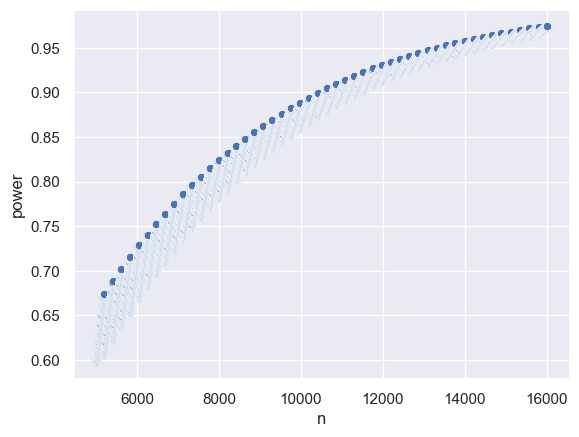

In [26]:
sns.scatterplot(data=df, x='n', y='power');

Wir schauen noch einmal feiner in den interessanten Abschnitt

In [27]:
dfein = pd.DataFrame()
dfein['n'] = np.arange(10200, 10700)
dfein['c'] = stats.binom(dfein.n, p0).ppf(1-alpha)
dfein['power'] = 1 - stats.binom(dfein.n, p).cdf(dfein.c)
dfein

,n,c,power
0,10200,52.0,0.869007
1,10201,52.0,0.869167
2,10202,52.0,0.869326
3,10203,52.0,0.869485
4,10204,52.0,0.869645
...,...,...,...
495,10695,54.0,0.889120
496,10696,54.0,0.889258
497,10697,54.0,0.889396
498,10698,54.0,0.889535


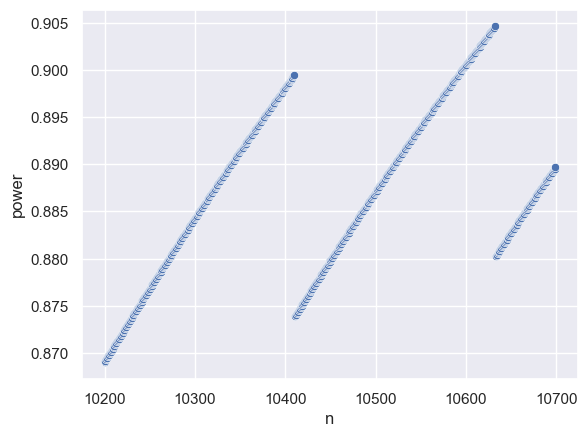

In [28]:
sns.scatterplot(data=dfein, x='n', y='power');

* Wir benötigen n=10600 

* An den Stellen, wo die Kurve nach unten springt, ändert sich der kritische Wert
* (falls das jemanden interessiert)

* In der Praxis würde man jetzt einen Stichprobenumfang von 10600 anstreben
* Ich zeige nun, wie man die genaue Zahl bekommt
* Dazu muss man die in `df` abgelegte Tabelle inspizieren

In [29]:
df[df.power==0.90]

,n,c,power


* der genaue Wert wird nicht angenommen
* daher ist die Tabelle leer
* Ausweg:  Schachtelung

In [31]:
df[(0.8999 <= df.power) & (df.power <= 0.9001)]

,n,c,power
5595,10595,53.0,0.899921
5596,10596,53.0,0.900050
5776,10776,54.0,0.899905
5777,10777,54.0,0.900033
5957,10957,55.0,0.899906
5958,10958,55.0,0.900033
6138,11138,56.0,0.899923
6139,11139,56.0,0.900049
6319,11319,57.0,0.899956
6320,11320,57.0,0.900081


Das kleinste n, bei dem die Power mindestens 90% beträgt, ist 10596

> `df[(0.8999 <= df.power) & (df.power <= 0.9001)]`

* `df.power`: Spalte der Tabelle
* `<`, `>`, `<=`, `>=`, `==`, `!=`: Vergleichsoperatoren
* der letzte bedeutet "ungleich"
* zwei Vergleiche werden verknüpft durch 
  * `&` "und"  (beide wahr)
  * `|` "oder" (mindestens einer wahr)